# Task - 6 Prediction using Decision Tree  Algorithm

#### Rohit Loharkar @ LetsGrowMore Intern April22

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.

**Link for the dataset:** https://bit.ly/3kXTdox

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [31]:
data = pd.read_csv("iris.csv")

In [32]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
data.shape

(150, 6)

In [34]:
print(*data.columns, sep = "\n")

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
data = data.drop(['Id'], axis = 1)

In [38]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

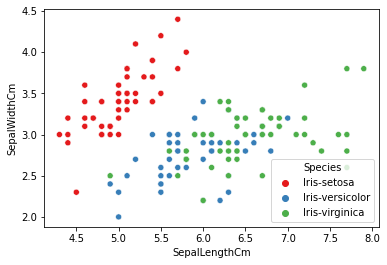

In [39]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data, palette = 'Set1')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

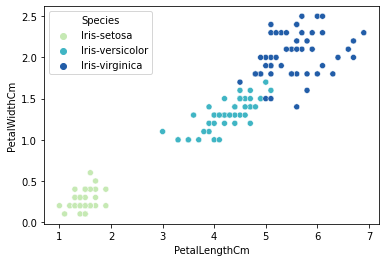

In [40]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data, palette = 'YlGnBu' )

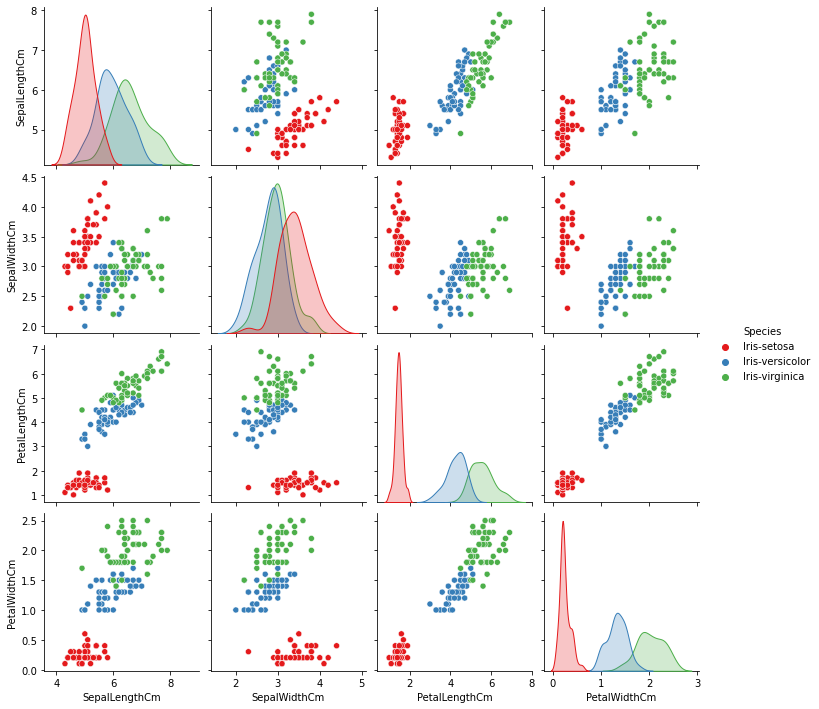

In [41]:
sns.pairplot(data, hue = 'Species', palette = 'Set1')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

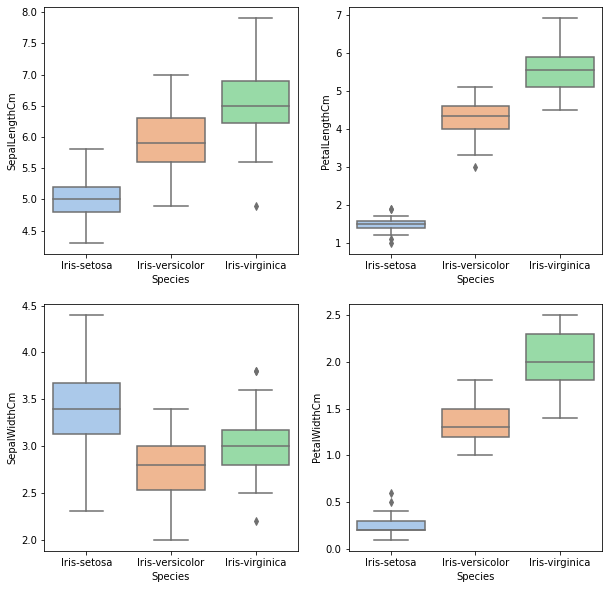

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,2)
# Checking for the outliers
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'pastel')

plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'pastel')


plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'pastel')

In [43]:
data = data.sample(frac = 1)

In [44]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,5.6,2.9,3.6,1.3,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
140,6.7,3.1,5.6,2.4,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
...,...,...,...,...,...
54,6.5,2.8,4.6,1.5,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa


In [45]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [46]:
X = data.drop(['Species'], axis = 1)
Y = data.Species

In [47]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
64             5.6           2.9            3.6           1.3
1              4.9           3.0            1.4           0.2
42             4.4           3.2            1.3           0.2
140            6.7           3.1            5.6           2.4
44             5.1           3.8            1.9           0.4
..             ...           ...            ...           ...
54             6.5           2.8            4.6           1.5
10             5.4           3.7            1.5           0.2
9              4.9           3.1            1.5           0.1
13             4.3           3.0            1.1           0.1
146            6.3           2.5            5.0           1.9

[150 rows x 4 columns]


In [48]:
print(Y)

64     1
1      0
42     0
140    2
44     0
      ..
54     1
10     0
9      0
13     0
146    2
Name: Species, Length: 150, dtype: int32


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)

In [50]:
X_train.shape

(112, 4)

In [51]:
X_test.shape

(38, 4)

In [52]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)

In [53]:
print(accuracy_score(Y_test, Y_pred)*100)

100.0


In [54]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



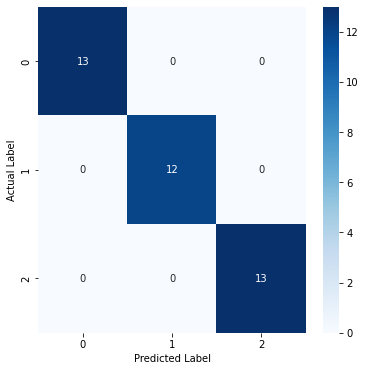

In [55]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [56]:
sample = np.array([[7.3,2.8,6.3, 1.8]]) #Prediction should be Iris-Verginica
print("The prediction is : ", int(DTC.predict(sample)))

The prediction is :  2


C:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


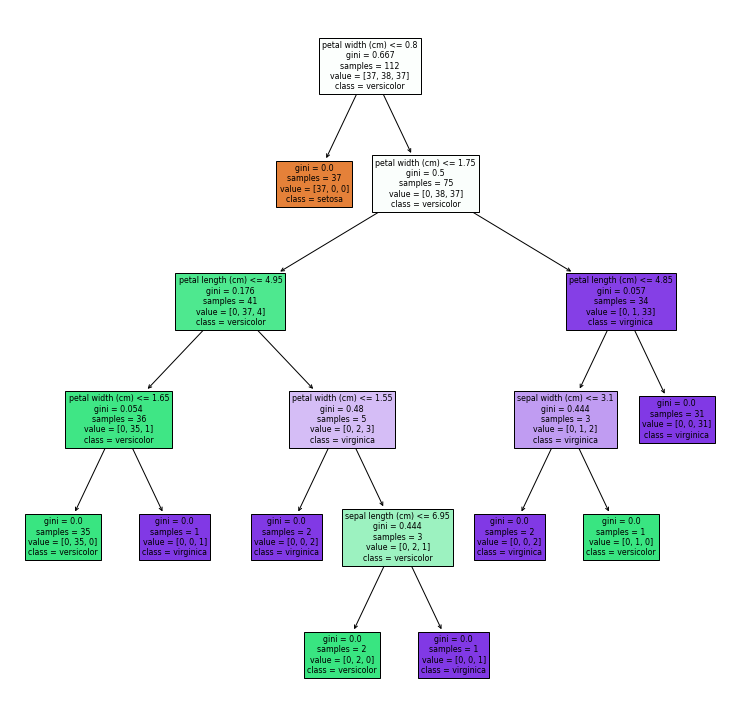

In [57]:
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (13,13))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);